In [19]:
import pandas as pd
import numpy as np
from scipy.stats import stats
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = 'CA_edu_data/'

## Try reading in full CSV (need to fix CDS code?)

In [21]:
sb_df_all = pd.read_csv(path+'HS_testscores_meta.csv')

In [22]:
_cds = []
for cds in sb_df_all['cds']:
    cds = str(cds)
    if len(cds)<14:
        cds = '0'*(14-len(cds))+cds
        _cds.append(cds)
    else:
        _cds.append(cds)
sb_df_all['cds'] = _cds  
sb_df_all = sb_df_all.set_index(sb_df_all.cds)

In [11]:
sb_df_all.describe()

,Unnamed: 0,id,county_code,district_code,school_code,test_year,subgroup_id,total_tested,total_scores,grade,...,RegularHSGradRate_RH,MetUCCSURate_GF,MetUCCSURate_GM,MetUCCSURate_RA,MetUCCSURate_RB,MetUCCSURate_RH,ELRate_12,Total_EL_12,MetUCCSURate_TA,CharterYN
count,2.185000e+03,2.185000e+03,2185.000000,2185.000000,2.185000e+03,2185.0,2185.0,2185.000000,2184.000000,2185.0,...,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.877484e+13,1.548834e+06,28.103890,67094.540961,2.230155e+06,2017.0,1.0,337.155149,336.791667,11.0,...,90.541551,59.945486,47.815278,44.778704,22.360417,46.326505,7.593862,29.854167,54.008796,0.094907
std,1.386343e+13,9.255008e+05,13.837218,6801.655427,1.731298e+06,0.0,0.0,207.625467,207.343137,0.0,...,11.698256,18.434365,20.746602,38.759712,26.176890,19.705001,7.204636,31.017145,19.201927,0.293172
min,1.100170e+12,1.792000e+03,1.000000,10017.000000,1.000650e+05,2017.0,1.0,11.000000,11.000000,11.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.964733e+13,8.048250e+05,19.000000,64733.000000,1.308640e+05,2017.0,1.0,141.000000,141.000000,11.0,...,88.600000,48.500000,33.775000,0.000000,0.000000,34.775000,2.313908,7.000000,41.200000,0.000000
50%,3.066514e+13,1.490513e+06,30.000000,67082.000000,1.938356e+06,2017.0,1.0,336.000000,336.000000,11.0,...,93.100000,59.100000,44.950000,59.400000,8.100000,43.500000,5.749669,22.000000,52.250000,0.000000
75%,3.768411e+13,2.344459e+06,37.000000,69641.000000,3.730066e+06,2017.0,1.0,492.000000,491.250000,11.0,...,96.200000,71.900000,59.100000,80.425000,42.625000,54.250000,10.802469,42.000000,65.525000,0.000000
max,5.872770e+13,3.264831e+06,58.000000,76976.000000,5.838305e+06,2017.0,1.0,1105.000000,1103.000000,11.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,62.962963,256.000000,100.000000,1.000000


In [12]:
for col in sb_df_all.columns:
    print(col)

Unnamed: 0
id
county_code
district_code
school_code
test_year
subgroup_id
test_type
total_tested
total_scores
grade
test_id
caaspp_rep_enrollment
students_tested
mean_scale_score
perc_std_exceed
perc_std_met
perc_std_met_exceed
perc_std_near_met
perc_std_not_met
students_with_scores
area1_perc_std_exceed
area1_perc_std_near
area1_perc_std_below
area2_perc_std_exceed
area2_perc_std_near
area2_perc_std_below
area3_perc_std_exceed
area3_perc_std_near
area3_perc_std_below
area4_perc_std_exceed
area4_perc_std_near
area4_perc_std_below
cds
id.1
cds.1
county_code.1
district_code.1
school_code.1
CohortStudents_All
CohortStudents_GF
CohortStudents_GM
CohortStudents_RA
CohortStudents_RB
CohortStudents_RH
RegularHSGradRate_GF
RegularHSGradRate_GM
RegularHSGradRate_RA
RegularHSGradRate_RB
RegularHSGradRate_RH
MetUCCSURate_GF
MetUCCSURate_GM
MetUCCSURate_RA
MetUCCSURate_RB
MetUCCSURate_RH
ELRate_12
Total_EL_12
MetUCCSURate_TA
District
CharterYN


In [23]:
assign_var = ['CharterYN','area1_perc_std_exceed','area3_perc_std_exceed', 'MetUCCSURate_RH','RegularHSGradRate_GF', 'ELRate_12', 'Total_EL_12', 'MetUCCSURate_TA']
assign_numeric = ['area1_perc_std_exceed','area3_perc_std_exceed', 'MetUCCSURate_RH','RegularHSGradRate_GF', 'ELRate_12', 'Total_EL_12', 'MetUCCSURate_TA']
assign_scaled = []
for col in assign_numeric:
    sb_df_all[col] = pd.to_numeric(sb_df_all[col])

assign_df =sb_df_all[assign_var].dropna()

In [24]:
# fix this to not be row-wise...
# this adds variables that are scaled to mean = 0 and unit standard deviation
for col in assign_numeric:
    avg = np.mean(assign_df[col])
    std = np.std(assign_df[col])
    _vec = []
    for ik in range(len(assign_df)):
        try:
            _vec.append((assign_df[col].iloc[ik]-avg)/std)
        except:
            _vec.append(np.nan)
    assign_scaled.append(col+'_ss')
    assign_df[col+'_ss'] = _vec #scaler.transform(assign_df[col])#
    #(assign_df[col]-np.mean(assign_df[col]))/assign_df[col].std
    #assign_numeric.append(col+_ss)
    


In [26]:
# scaler = preprocessing.StandardScaler().fit(HS_sub[HS_numeric])
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)

assign_df_scaled = assign_df[assign_numeric]
assign_df_scaled[assign_numeric] = pt.fit_transform(assign_df_scaled)

for col in assign_df_scaled.columns:
    assign_df[col+'_pt'] = assign_df_scaled[col] 
    assign_scaled.append(col+'_pt')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(key, value)


In [15]:
means = assign_df[['area1_perc_std_exceed','area3_perc_std_exceed']].mean(axis=0)
stds = assign_df[['area1_perc_std_exceed','area3_perc_std_exceed']].std(axis=0)
assign_df['areas13_perc_std_exceed_ss'] = ((assign_df[['area1_perc_std_exceed','area3_perc_std_exceed']] - means) / stds).mean(axis=1)
assign_scaled.append('areas13_perc_std_exceed_ss')


In [16]:
assign_df['ELRate_12_sqrt_ss']= np.sqrt(assign_df['ELRate_12'].dropna())
assign_df['ELRate_12_sqrt_ss'] = (assign_df['ELRate_12_sqrt_ss']-assign_df['ELRate_12_sqrt_ss'].mean(axis=0))/assign_df['ELRate_12_sqrt_ss'].std(axis=0)

assign_scaled.append('ELRate_12_sqrt_ss')

In [17]:
assign_df['RegularHSGradRate_GF_sqrt_ss']= np.sqrt(assign_df['RegularHSGradRate_GF'].dropna())
assign_df['RegularHSGradRate_GF_sqrt_ss'] = (assign_df['RegularHSGradRate_GF_sqrt_ss']-assign_df['RegularHSGradRate_GF_sqrt_ss'].mean(axis=0))/assign_df['RegularHSGradRate_GF_sqrt_ss'].std(axis=0)
assign_scaled.append('RegularHSGradRate_GF_sqrt_ss')

In [ ]:
means = assign_df[['RegularHSGradRate_RB','RegularHSGradRate_RA']].mean(axis=0)
stds = assign_df[['RegularHSGradRate_RB','RegularHSGradRate_RA']].std(axis=0)
assign_df['RegularHSGradRate_RBRA_ss'] = ((assign_df[['RegularHSGradRate_RB','RegularHSGradRate_RA']] - means) / stds).mean(axis=1)
assign_scaled.append('RegularHSGradRate_RBRA_ss')


In [74]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False,  
                        include_bias=False)
res = pf.fit_transform(assign_df[['ELRate_12_ss', 'MetUCCSURate_RH_ss']])

intr_features = pd.DataFrame(res, columns=['EL12', 'elig_RH',  
                                           'ELRate_12_2', 
                                           'ELRate_12_x_MetUCCSURate_RH',  
                                           'MetUCCSURate_RH_2'])

assign_df['ELRate_12_2'] = intr_features['ELRate_12_2']
assign_df['ELRate_12_x_MetUCCSURate_RH'] = intr_features['ELRate_12_x_MetUCCSURate_RH']
assign_df['MetUCCSURate_RH_2'] = intr_features['MetUCCSURate_RH_2']

assign_scaled.append('ELRate_12_2')
assign_scaled.append('ELRate_12_x_MetUCCSURate_RH')
assign_scaled.append('MetUCCSURate_RH_2')

In [75]:
intr_features.head()

,EL12,elig_RH,ELRate_12_2,ELRate_12_x_MetUCCSURate_RH,MetUCCSURate_RH_2
0,-1.054329,2.724640,1.111611,-2.872668,7.423663
1,-1.054329,2.724640,1.111611,-2.872668,7.423663
2,-1.054329,0.044341,1.111611,-0.046750,0.001966
3,-1.054329,0.044341,1.111611,-0.046750,0.001966
4,-1.054329,0.018960,1.111611,-0.019990,0.000359


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


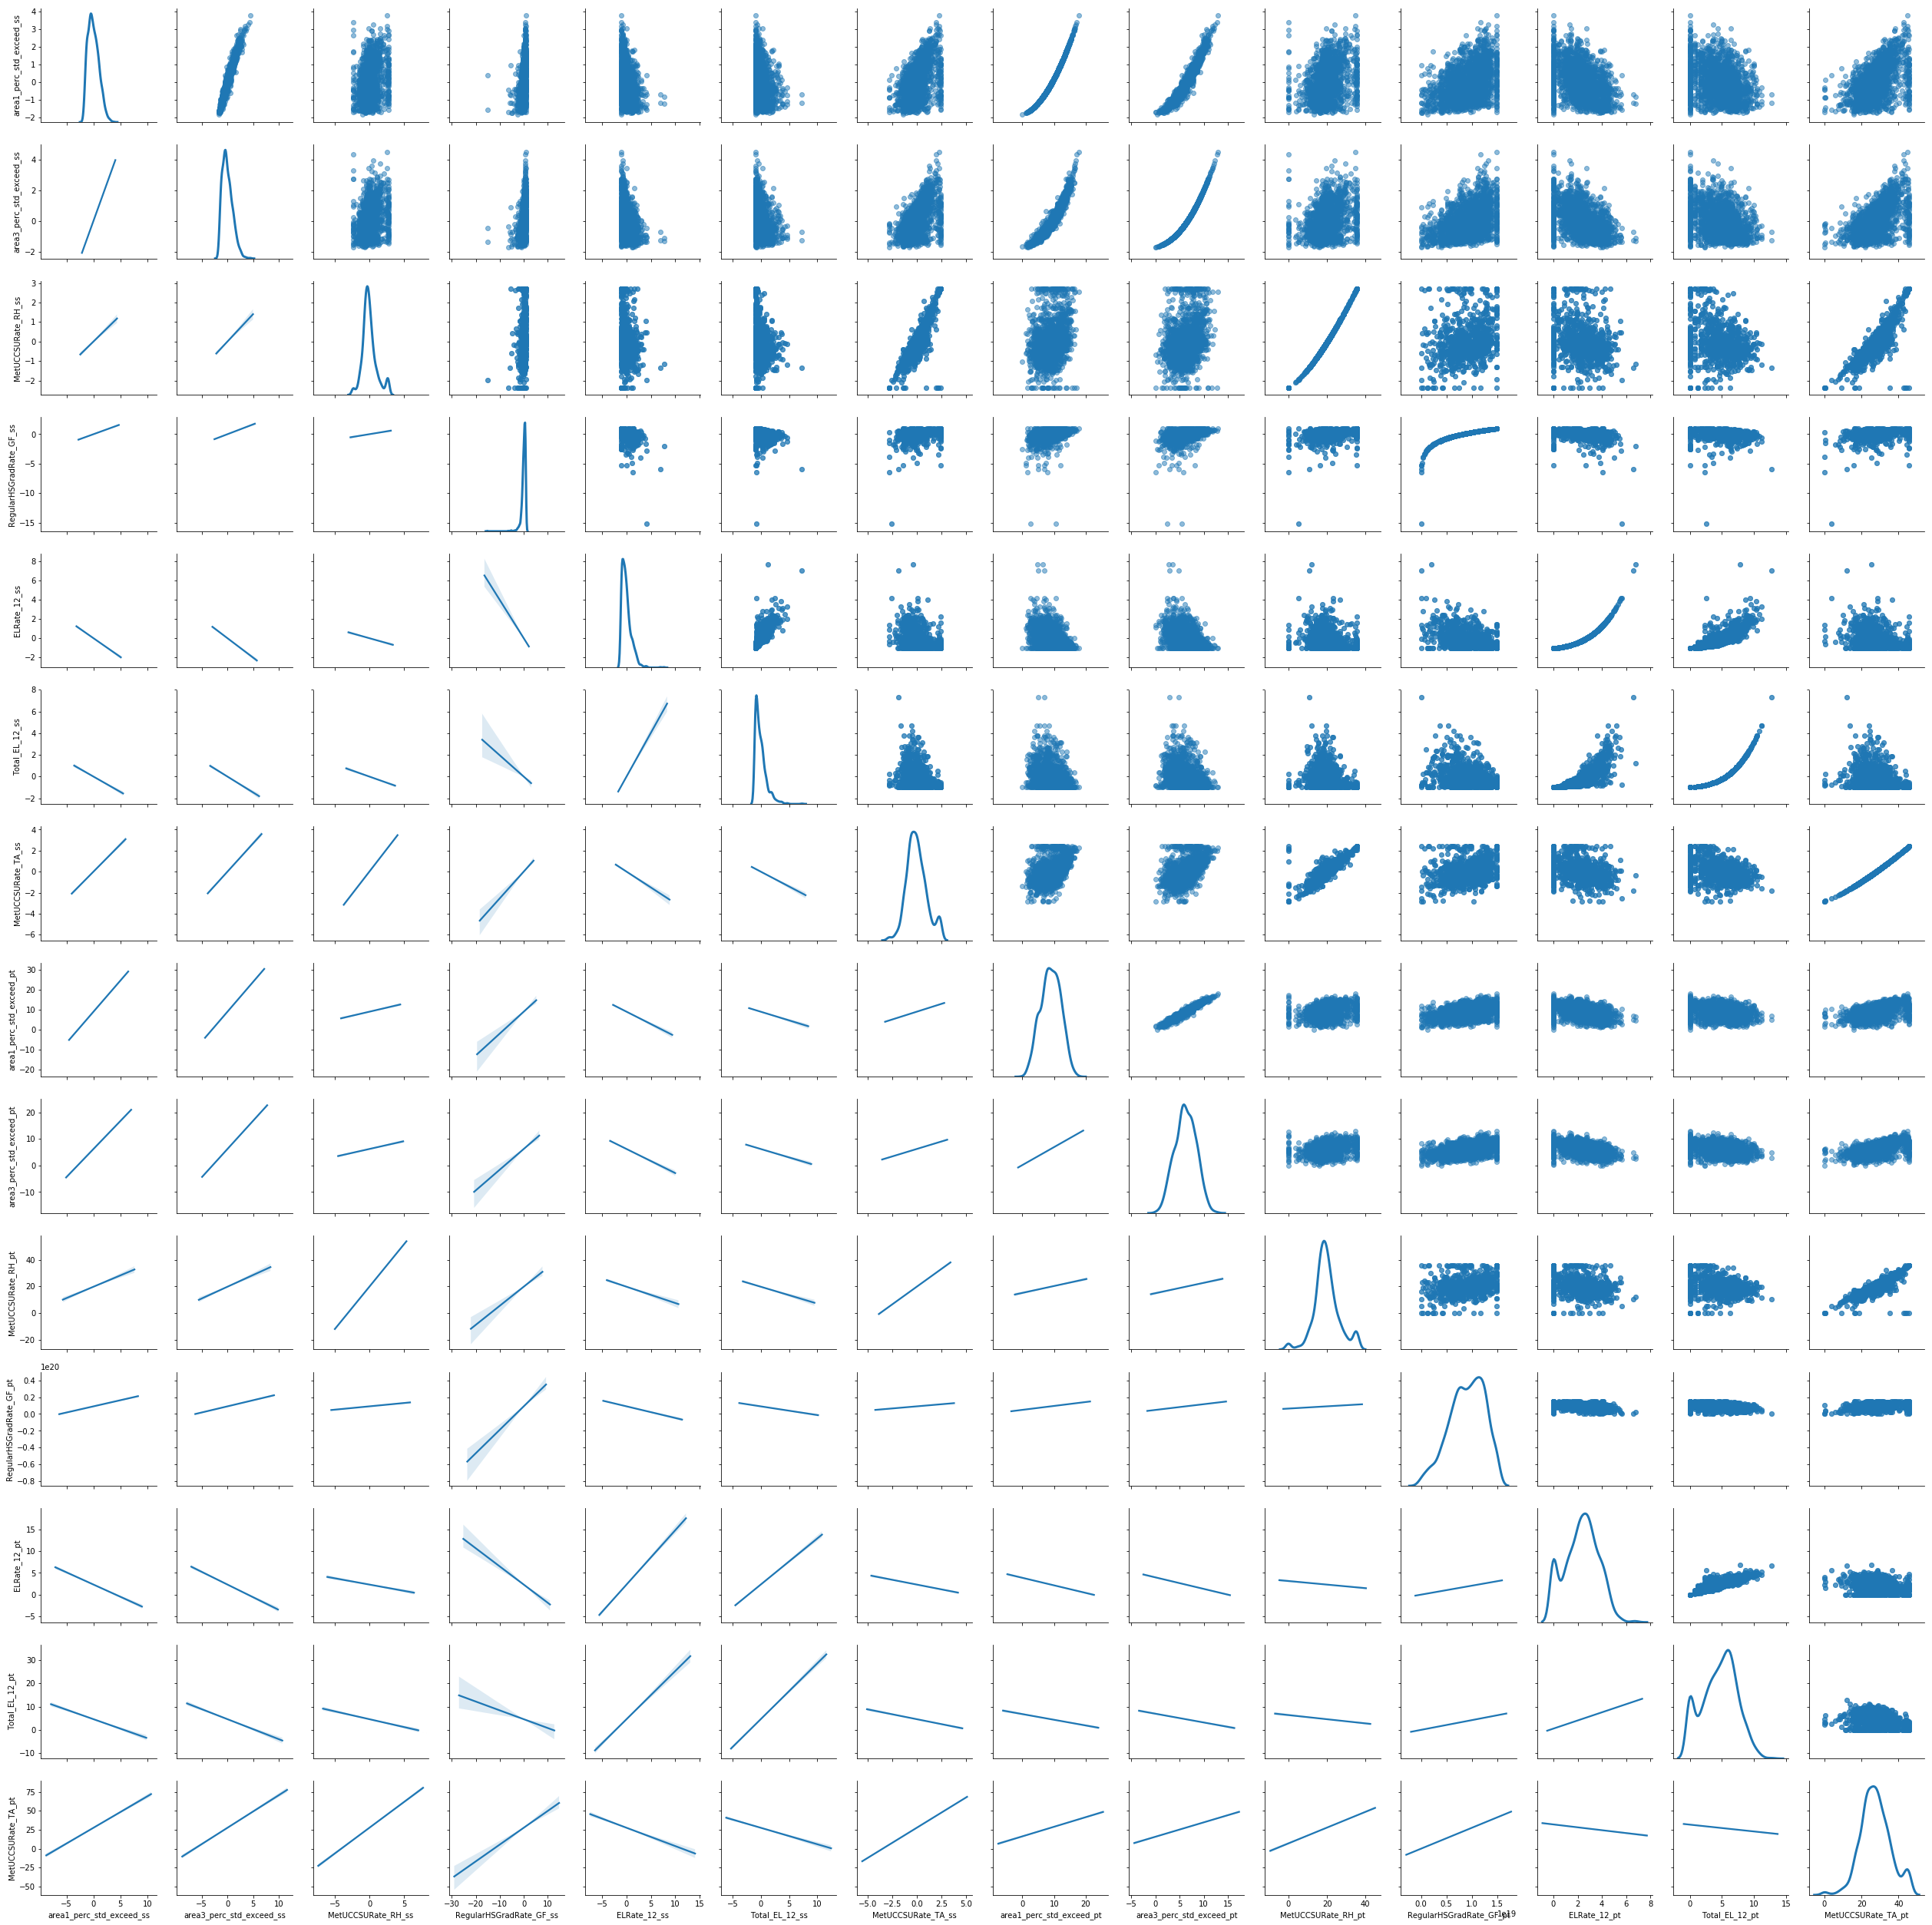

In [27]:
g = sns.PairGrid(assign_df[assign_scaled].dropna(), diag_sharey = False)
g.map_upper(plt.scatter, alpha = .5)
g.map_lower(sns.regplot, scatter_kws= dict(alpha = 0))
g.map_diag(sns.kdeplot, lw = 3)


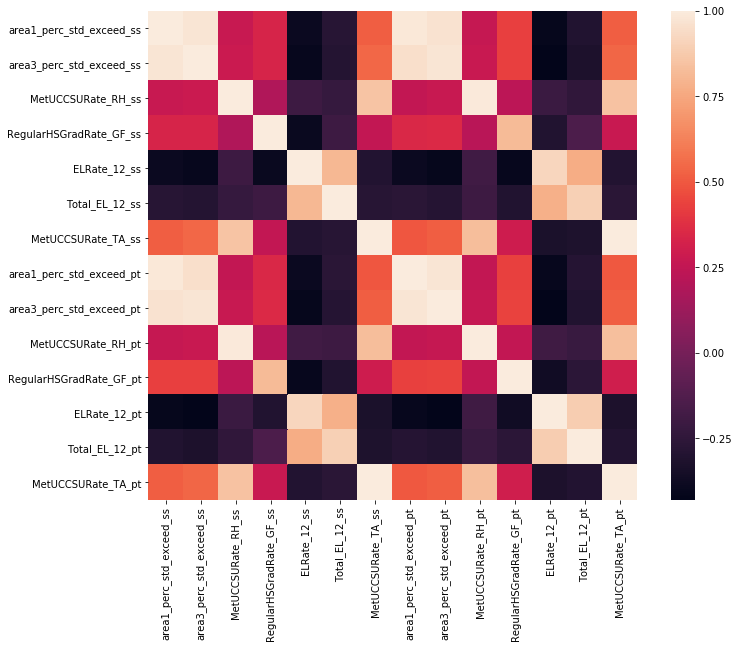

In [28]:
corrmat = assign_df[assign_scaled].dropna().corr()

fig, ax = plt.subplots(1,1, figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True)

In [52]:
testing = ['perc_std_exceed',
       'perc_std_met_exceed', 'area1_perc_std_exceed', 'area2_perc_std_exceed', 'area3_perc_std_exceed',
         'RegularHSGradRate_GF', 'RegularHSGradRate_RB',
         'MetUCCSURate_RA', 'MetUCCSURate_RB',  'ELRate_12',
       'MetUCCSURate_TA']
# 'perc_std_met','RegularHSGradRate_RA',
# 'RegularHSGradRate_GF', 'RegularHSGradRate_GM','RegularHSGradRate_GF', 'RegularHSGradRate_GM',
# 'RegularHSGradRate_RH', 'MetUCCSURate_RH', 'cds','mean_scale_score', 'area4_perc_std_exceed',
# 'area1_perc_std_near','area3_perc_std_near','area2_perc_std_near',  'area4_perc_std_near',


In [166]:
scaler = preprocessing.StandardScaler().fit(sb_df_all[testing])

sb_df_all_scaled = sb_df_all[testing]
sb_df_all_scaled[testing] = scaler.fit_transform(sb_df_all_scaled)# scaler.transform(HS_sub[HS_numeric].dropna())

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:2544: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:2514: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 

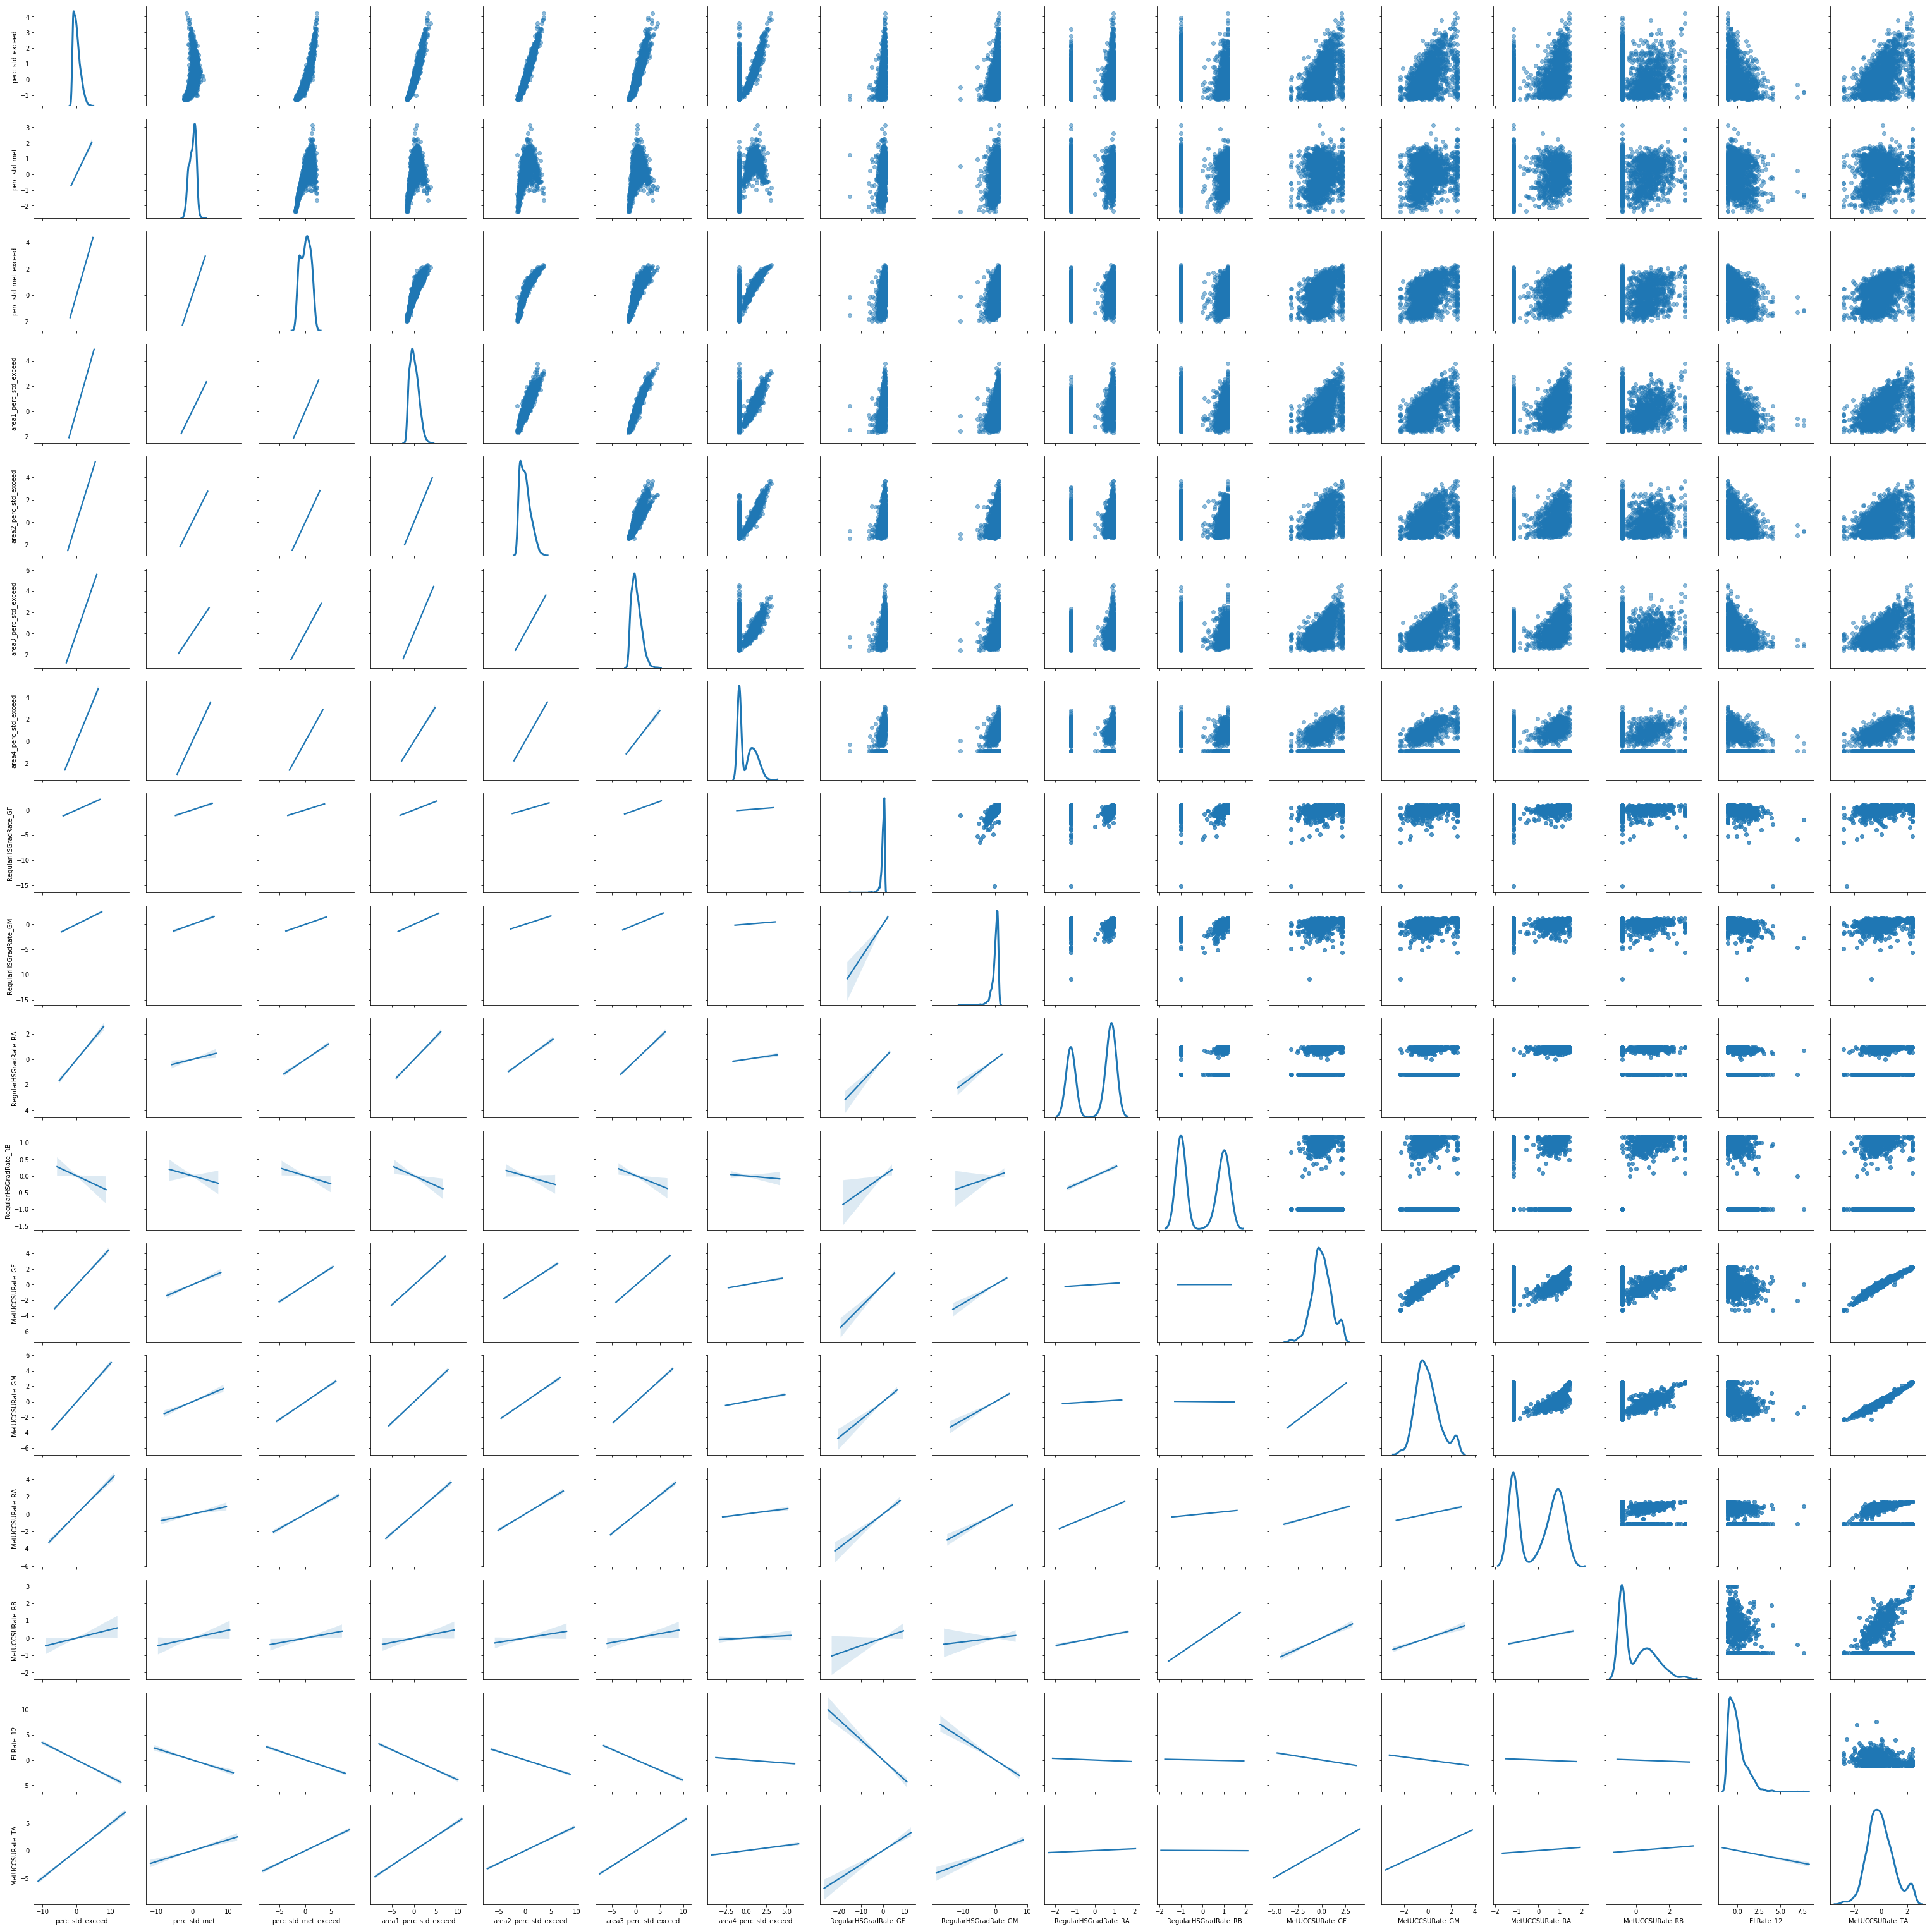

In [167]:
g = sns.PairGrid(sb_df_all_scaled[testing].dropna(), diag_sharey = False)
g.map_upper(plt.scatter, alpha = .5)
g.map_lower(sns.regplot, scatter_kws= dict(alpha = 0))
g.map_diag(sns.kdeplot, lw = 3)


In [168]:
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
# scaler = preprocessing.StandardScaler().fit(HS_sub[HS_numeric])
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)

sb_df_all_scaled2 = sb_df_all[testing]
sb_df_all_scaled2[testing] = pt.fit_transform(sb_df_all_scaled2)# scaler.transform(HS_sub[HS_numeric].dropna())


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:2544: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:2514: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(key, v

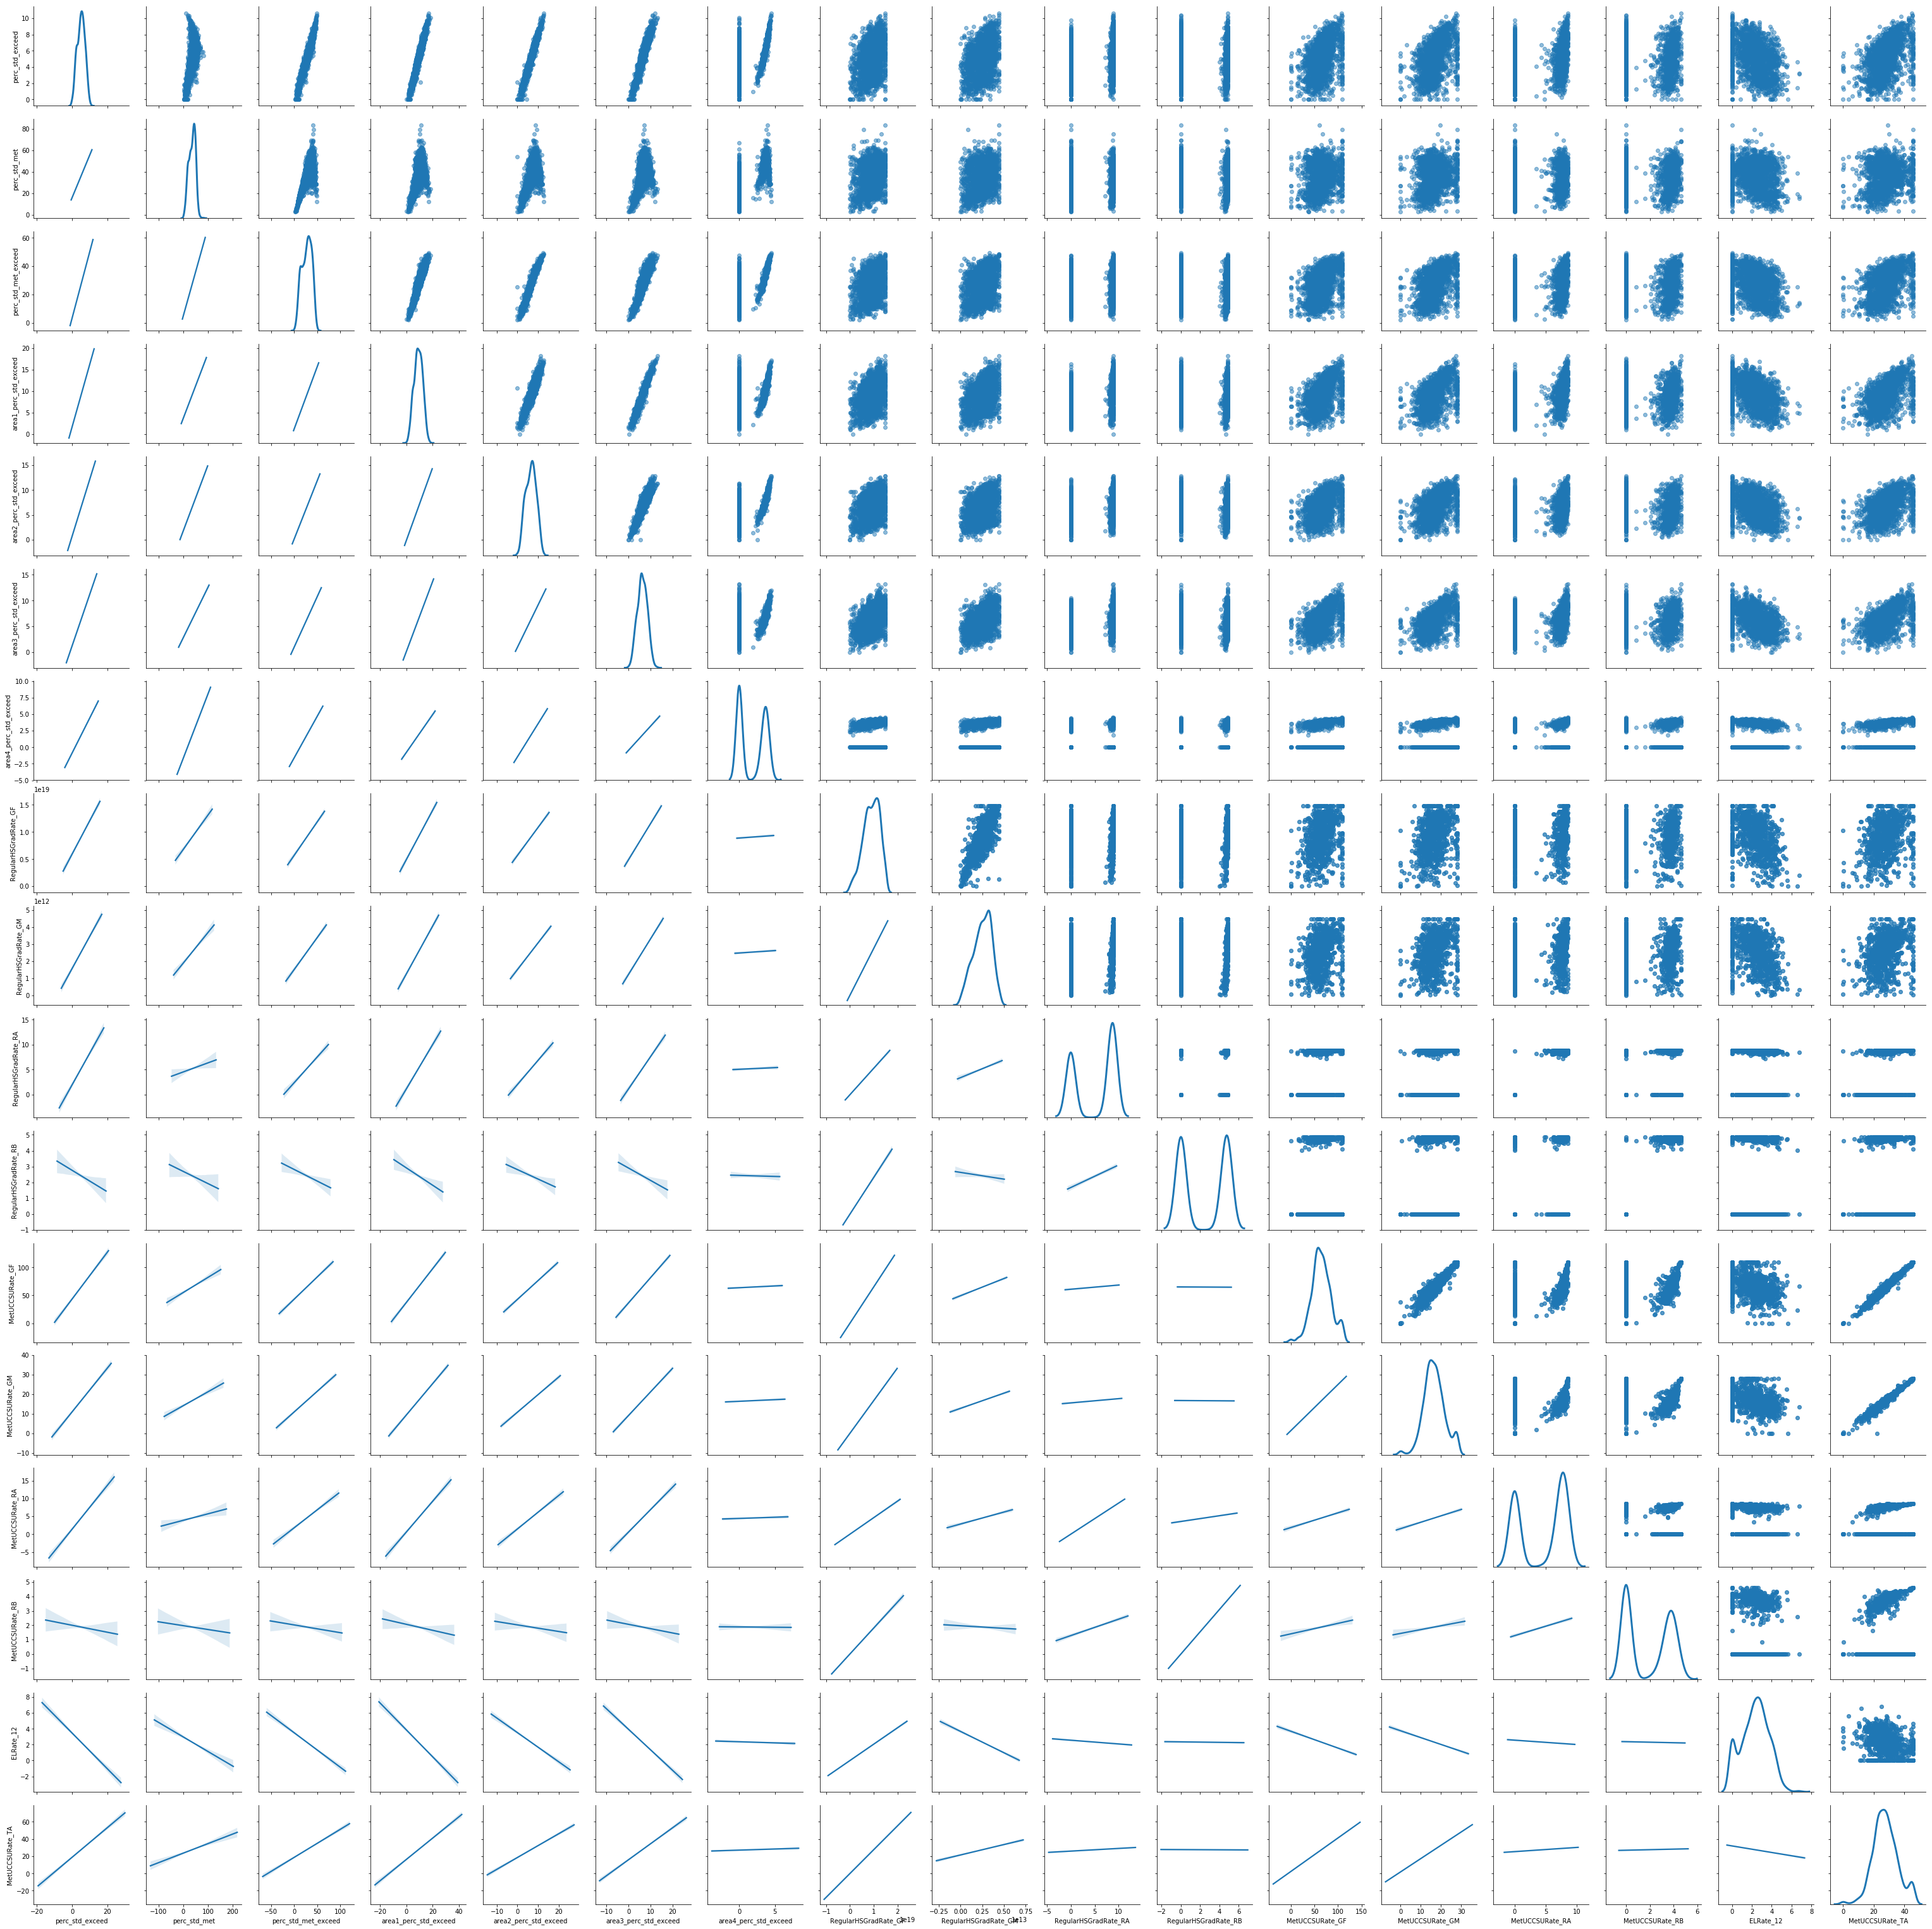

In [169]:
g = sns.PairGrid(sb_df_all_scaled2[testing].dropna(), diag_sharey = False)
g.map_upper(plt.scatter, alpha = .5)
g.map_lower(sns.regplot, scatter_kws= dict(alpha = 0))
g.map_diag(sns.kdeplot, lw = 3)


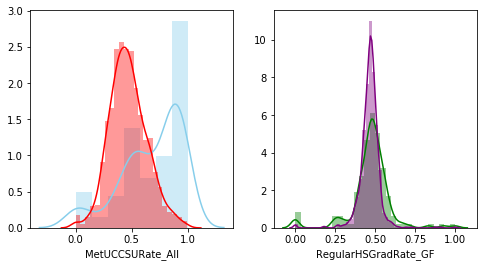

In [471]:
# print(len(HS_sub['MetUCCSURate_All'].dropna()), len(HS_sub['MetUCCSURate_All']))
# sns.distplot(HS_sub[HS_sub.CharterYN == 1]['MetUCCSURate_All'].dropna(), color= 'skyblue')
# sns.distplot(HS_sub[HS_sub.CharterYN == 0]['MetUCCSURate_All'].dropna(), color= 'red')

fig, ax = plt.subplots(1, 2, figsize = (8, 4))
# print(len(HS_sub['MetUCCSURate_All'].dropna()), len(HS_sub['MetUCCSURate_All']))
sns.distplot(HS_sub[HS_sub.CharterYN == 1]['MetUCCSURate_All'].dropna(), color= 'skyblue', ax = ax[0])
sns.distplot(HS_sub[HS_sub.CharterYN == 0]['MetUCCSURate_All'].dropna(), color= 'red', ax = ax[0])

sns.distplot(HS_sub[HS_sub.CharterYN == 1]['RegularHSGradRate_GF'].dropna(), color= 'green', ax = ax[1])
sns.distplot(HS_sub[HS_sub.CharterYN == 0]['RegularHSGradRate_GF'].dropna(), color= 'purple', ax = ax[1])
# There is no number that demonstrates that school district size has an appreciable effect
# on UC/CSU eligibility